# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [11]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
employee.groupby('Department').agg({'Salary':'mean'}).reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [6]:
# your answer here-2nd way
pd.pivot_table(employee, columns='Department', values='Salary', aggfunc='mean')

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [7]:
# your answer here
pd.pivot_table(employee, index=['Department','Title'], values='Salary', aggfunc='mean').reset_index()

,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
# your answer here
pd.pivot_table(employee, index=['Department','Title'], values='Salary', columns='Years', aggfunc='mean', fill_value=0)

Years                  1   2   3   4   7   8
Department Title                            
HR         VP          0   0   0   0   0  70
           analyst     0  30   0  35   0   0
IT         VP          0   0   0   0   0  70
           analyst    35  30   0   0   0   0
           associate   0   0   0   0  60   0
Sales      associate   0  55  55   0   0   0

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [15]:
# your answer here
pd.pivot_table(employee, index=['Department','Title'], values=['Salary','Name'], aggfunc={'Salary':'mean', 'Name':'count'}).reset_index().rename(columns={'Name':'Number_of_Employees'})

,Department,Title,Number_of_Employees,Salary
0,HR,VP,1,70.0
1,HR,analyst,2,32.5
2,IT,VP,1,70.0
3,IT,analyst,2,32.5
4,IT,associate,1,60.0
5,Sales,associate,2,55.0


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [29]:
# your answer here
pd.pivot_table(employee, index=['Department','Title'], values='Salary', aggfunc={'median','min','max','std'}).reset_index()

,Department,Title,max,median,min,std
0,HR,VP,70.0,70.0,70.0,NaN
1,HR,analyst,35.0,32.5,30.0,3.535534
2,IT,VP,70.0,70.0,70.0,NaN
3,IT,analyst,35.0,32.5,30.0,3.535534
4,IT,associate,60.0,60.0,60.0,NaN
5,Sales,associate,55.0,55.0,55.0,0.000000


#### Based on your comments, fill the missing values with an appropriate value

In [30]:
# your answer here
pd.pivot_table(employee, index=['Department','Title'], values='Salary', aggfunc={'median','min','max','std'}).fillna(0).reset_index()

,Department,Title,max,median,min,std
0,HR,VP,70.0,70.0,70.0,0.000000
1,HR,analyst,35.0,32.5,30.0,3.535534
2,IT,VP,70.0,70.0,70.0,0.000000
3,IT,analyst,35.0,32.5,30.0,3.535534
4,IT,associate,60.0,60.0,60.0,0.000000
5,Sales,associate,55.0,55.0,55.0,0.000000


#### The stake holders want to know for each department the number of employees and how much money is spent on salaries. Could you provide that information? 

In [33]:
# your answer here
pd.pivot_table(employee, index='Department', values=['Salary','Name'], aggfunc={'Salary':'sum','Name':'count'}).reset_index().rename(columns={'Salary':'Sum_of_Salaries','Name':'Number_of_Employees'})

,Department,Number_of_Employees,Sum_of_Salaries
0,HR,3,135
1,IT,4,195
2,Sales,2,110


#### For each Department and Title, we want to know the total years of work experience and the mean salary

In [34]:
# your answer here
pd.pivot_table(employee, index=['Department','Title'], values=['Salary','Years'], aggfunc={'Salary':'mean','Years':'sum'}).reset_index().rename(columns={'Salary':'Mean_of_Salaries','Years':'Total_Years'})

,Department,Title,Mean_of_Salaries,Total_Years
0,HR,VP,70.0,8
1,HR,analyst,32.5,6
2,IT,VP,70.0,8
3,IT,analyst,32.5,3
4,IT,associate,60.0,7
5,Sales,associate,55.0,5


#### Bonus

#### We now want to compute the mean salary after removing the maximum for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [61]:
# your answer here--Your custom function here
def remove_max(df):
    for department in df['Department'].unique():
        df = df.drop(index=df[df['Department'] == department].sort_values(by='Salary', ascending=False)[0:1].index)
    return df.reset_index(drop=True)

In [64]:
# your answer here
pd.pivot_table(remove_max(employee), index='Department', values='Salary', aggfunc='mean').reset_index()

,Department,Salary
0,HR,32.500000
1,IT,41.666667
2,Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [17]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
5,13-05-2015,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457
6,14-05-2015,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415
7,15-05-2015,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306
8,16-05-2015,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507
9,17-05-2015,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291


#### Explore your dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [19]:
# your answer here
fitbit.shape
fitbit.info()
fitbit.describe()

(367, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here
fitbit[['Steps', 'Minutes Very Active']].corr()

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

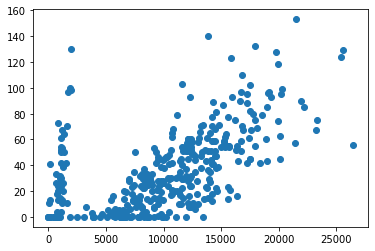

In [21]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['Minutes Very Active'])

#### What can you say about Minute Very Active and Steps? Write a comment below

* They seem to have some good correlation, there's also people who walk a lot but don't have minutes with very active

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [22]:
# your answer here
fitbit[['Steps', 'Minutes Sedentary']].corr()

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

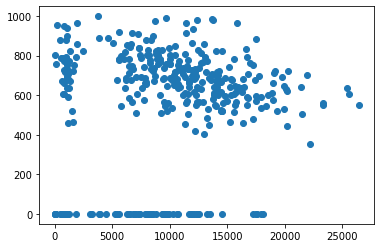

In [23]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['Minutes Sedentary'])

* Variables are independent

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:
# your answer here
fitbit[['Steps', 'MinutesOfSleep']].corr()

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

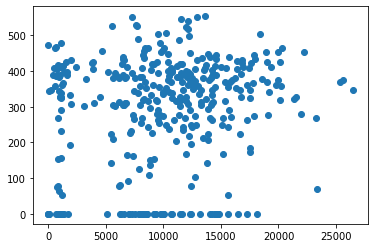

In [25]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['MinutesOfSleep'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [26]:
# your answer here
columns = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[columns]

In [27]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [46]:
# your answer here
cor_fit.corr().sort_values('Steps', ascending = False, axis = 0).loc[:,['Steps','Minutes Very Active','Floors','Calorie burned','MinutesOfSleep','Minutes Sedentary']]

,Steps,Minutes Very Active,Floors,Calorie burned,MinutesOfSleep,Minutes Sedentary
Steps,1.000000,0.571452,0.306511,0.255305,0.130986,0.076906
Minutes Very Active,0.571452,1.000000,0.399503,0.197881,0.108018,0.105963
Floors,0.306511,0.399503,1.000000,0.130757,0.069464,0.057812
Calorie burned,0.255305,0.197881,0.130757,1.000000,0.011485,0.125353
MinutesOfSleep,0.130986,0.108018,0.069464,0.011485,1.000000,0.204242
Minutes Sedentary,0.076906,0.105963,0.057812,0.125353,0.204242,1.000000


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [47]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [48]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

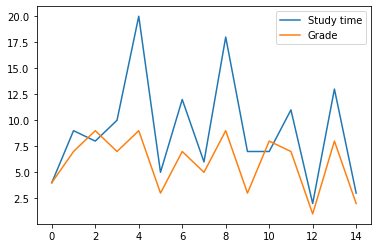

In [50]:
# your answer here
time_grades.plot()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [53]:
# your answer here-Pearson
time_grades[['Study time','Grade']].corr('pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [54]:
## your answer here-Spearman
time_grades[['Study time','Grade']].corr('spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

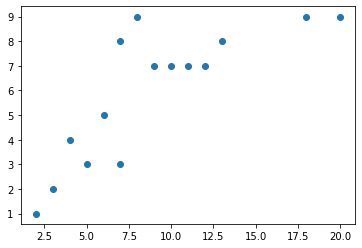

In [55]:
# your answer here
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'])

* Variables are highly correlated

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Pearson's correlation as the variables become independent (when one variable changes the other one doesn't change consistently), Pearson's correlation is less than 1 but Spearman's may still be closer to 1